<a href="https://colab.research.google.com/github/rahool010/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Book Recommendation System </u></b>

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

## <b> Content </b>

The Book-Crossing dataset comprises 3 files.

##**Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

##**Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

##**Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit, *expressed* on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
from sklearn.neighbors import NearestNeighbors 
from scipy.sparse import csr_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
users_df = pd.read_csv("/content/drive/MyDrive/Almabetter/Book Recommendation system - Rahul Shah/Users.csv")
books_df = pd.read_csv("/content/drive/MyDrive/Almabetter/Book Recommendation system - Rahul Shah/Books.csv")
ratings_df = pd.read_csv("/content/drive/MyDrive/Almabetter/Book Recommendation system - Rahul Shah/Ratings.csv")

## **Data Preprocessing**

In [ ]:
# displaying first 5 and last 5 observations
books_df.head().append(books_df.tail())

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [ ]:
# checking null values
print(books_df.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [ ]:
# checking datatypes
print(books_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


In [ ]:
# check shape of dataset
print(books_df.shape)

(271360, 8)


In [ ]:
print(books_df['Year-Of-Publication'].unique())

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '1952' '1940' '1951' '1931' '1954

It can be seen that there are some wrong entries. Publisher's name ('DK Publishing Inc' and 'Gallimard') are wrongly entered. 

In [ ]:
# finding the book record location for which Year-Of-Publication is 'DK Publishing Inc'
books_df.loc[books_df['Year-Of-Publication'] == 'DK Publishing Inc', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
# From above, it is seen that book author is incorrectly loaded with book title, hence making required corrections 
# corrections in the book record for ISBN 0789466953
books_df.loc[books_df.ISBN == '0789466953', 'Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '0789466953', 'Book-Author'] = "James Buckley"
books_df.loc[books_df.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

# corrections in the book record for ISBN 078946697X
books_df.loc[books_df.ISBN == '078946697X','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books_df.loc[books_df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [ ]:
# rechecking 
books_df.loc[(books_df.ISBN == '0789466953') | (books_df.ISBN == '078946697X'), :]  

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
# finding the book record location for which the year of publication is 'Gallimard'
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
#making required corrections as above, keeping other fields intact
books_df.loc[books_df.ISBN == '2070426769','Year-Of-Publication'] = 2003
books_df.loc[books_df.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books_df.loc[books_df.ISBN == '2070426769','Publisher'] = "Gallimard"
books_df.loc[books_df.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

# rechecking
books_df.loc[books_df.ISBN == '2070426769', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
# Filling Image-URL-L
books_df.loc[books_df.ISBN == '0789466953', 'Image-URL-L'] = "http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg"
books_df.loc[books_df.ISBN == '078946697X','Image-URL-L'] = "http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg"
books_df.loc[books_df.ISBN == '2070426769','Image-URL-L'] = "http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg"

In [ ]:
# correcting the datatypes of year of publication
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')  # invalid parsing will be set as NaN
print(sorted(books_df['Year-Of-Publication'].unique()))   # identifying different years of publication existed in books record

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


The value 0 for the Year-Of-Publication is invalid and as this dataset was published in 2004. We have assumed that the years after 2006 will be invalid. So, setting invalid years as NaN.

In [ ]:
books_df.loc[(books_df['Year-Of-Publication'] > 2006) | (books_df['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = np.nan

# replacing NaN's with median value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].median()), inplace=True)

In [ ]:
 # converting the datatype of year of publication as int32 
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(np.int32)

In [ ]:
#dropping the columns containing image URLs which will not be required for analysis
books_df.drop(['Image-URL-S', 'Image-URL-M'],axis=1,inplace=True)

In [ ]:
# check missing values
print(books_df.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-L            0
dtype: int64


In [ ]:
# finding the locations of records in which publisher with NaN or Null
books_df.loc[books_df['Publisher'].isnull(), :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...


In [ ]:
# # the null publishers are replaced with 'others' in the books records
# books_df.Publisher.fillna('other', inplace=True)

In [ ]:
# the null publishers are replaced with their respective publishers by searching over the internet
books_df.loc[books_df.ISBN=='193169656X','Publisher']='Bantam'
books_df.loc[books_df.ISBN=='1931696993','Publisher']='Novelbooks Inc'

In [ ]:
# # recheck publisher
# books_df.loc[books_df['Book-Author'] == 'Linnea Sinclair', :]

In [ ]:
# exploring the book author column
books_df.loc[books_df['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...


In [ ]:
# # filling NaN of Book-Author with 'other'
# books_df['Book-Author'].fillna('other', inplace=True)

In [ ]:
# the null book-author is replaced with original book author by searching over the internet
books_df.loc[books_df.ISBN=='9627982032','Book-Author']='Larissa Anne Downe'

In [ ]:
# # recheck author
# books_df.loc[books_df['Book-Author'] == 'Larissa Anne Downe', :]

In [ ]:
# check null values
print(books_df.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-L            0
dtype: int64


**Book-Title**

In [ ]:
print(books_df['Book-Title'].describe())

count             271360
unique            242135
top       Selected Poems
freq                  27
Name: Book-Title, dtype: object


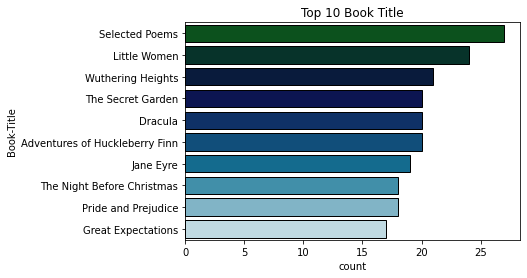

In [ ]:
sns.countplot(y='Book-Title', data=books_df, order=pd.value_counts(books_df['Book-Title']).iloc[:10].index,
              palette='ocean', edgecolor='k')
plt.title('Top 10 Book Title')
plt.show()

**Book Author**

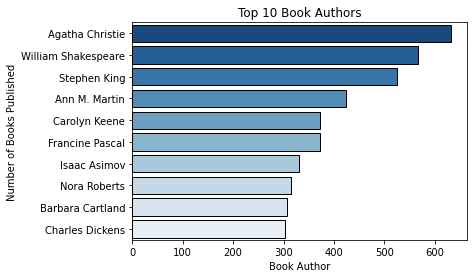

In [ ]:
# counting boooks written by each author
cnt = books_df.groupby(['Book-Author'])['Book-Title'].count().sort_values(ascending=False).head(10)
cnt = cnt.reset_index()

# plotting the top 10 authors with most number of books
sns.barplot(data=cnt, y='Book-Author', x='Book-Title', palette='Blues_r', edgecolor='k')
plt.xlabel('Book Author')
plt.ylabel('Number of Books Published')
plt.title('Top 10 Book Authors')
plt.show()

From the above graph, we see 'Agatha Christie' has the most number of books.

**Publisher**

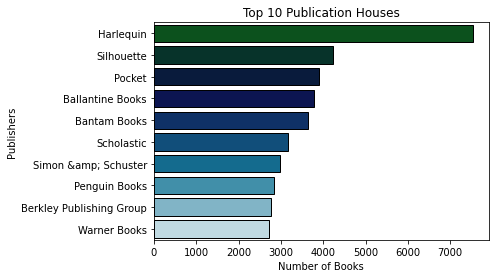

In [ ]:
# counting books published by each publisher
cnt = books_df.groupby(['Publisher'])['Book-Title'].count().sort_values(ascending=False).head(10)
cnt = cnt.reset_index()

# plotting the top 10 authors with most number of books
sns.barplot(data=cnt, x='Book-Title', y='Publisher', palette='ocean', edgecolor='k')
plt.xlabel('Number of Books')
plt.ylabel('Publishers')
plt.title('Top 10 Publication Houses')
plt.show()

'Harlequin' has published the most number of books.

### **Users dataset**

In [ ]:
# displaying top 5 rows of users dataset
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# check shape 
print(users_df.shape)

(278858, 3)


In [ ]:
# displaying datatypes
print(users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None


In [ ]:
# check the count and percentage of null values
null_df=pd.DataFrame({'null_values':users_df.isnull().sum(),
                  'null_percent':users_df.isnull().sum()/users_df.shape[0]*100})
null_df=null_df[null_df['null_values']>0]
null_df

,null_values,null_percent
Age,110762,39.719857


Only Age column has missing values around 39%.

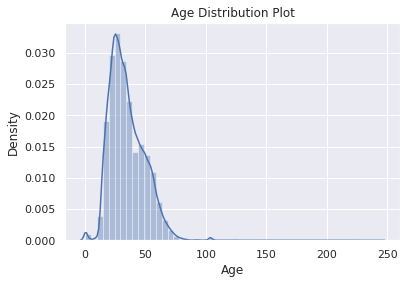

In [ ]:
# let's check the Age distribution
sns.set_theme(style='darkgrid')
sns.distplot(users_df.Age)
plt.title('Age Distribution Plot')
plt.show()

Age values below 5 and above 90 does not make sense for our book rating case. Hence, will make these values as NaN's and fill those NaN values with the mean values.

In [ ]:
# take a look at locations
print(users_df['Location'].values)

['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'brampton, ontario, canada'
 'knoxville, tennessee, usa' 'dublin, n/a, ireland']


In [ ]:
# number of unique locations
print(users_df['Location'].nunique())

57339


lot of unique values, so let's create Country column

In [ ]:
for i in users_df:
    users_df['Country'] = users_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [ ]:
print(users_df.Country.nunique())

529


In [ ]:
# drop location column
users_df.drop(['Location'], axis=1, inplace=True)

In [ ]:
# change country datatype as string
users_df['Country'] = users_df['Country'].astype('str')

In [ ]:
# check the values in the country column
a=list(users_df.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [ ]:
#so many missplelling, need to correct it 
users_df['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

In [ ]:
# making the ages above 90 years and below 5 years age as NaN 
users_df.loc[(users_df.Age > 90) | (users_df.Age < 5), 'Age'] = np.nan

#### Age has the positive skewness, so we can use median values to replace NaN values
users_df['Age'] = users_df['Age'].fillna(users_df.groupby('Country')['Age'].transform('median'))

In [ ]:
# recheck
print(users_df.isna().sum())

User-ID      0
Age        276
Country      0
dtype: int64


Still there are 276 NaN values, let's fill these values with mean.

In [ ]:
users_df['Age'].fillna(users_df.Age.mean(),inplace=True)

In [ ]:
# recheck
print(users_df.isnull().sum())

User-ID    0
Age        0
Country    0
dtype: int64


**Country**

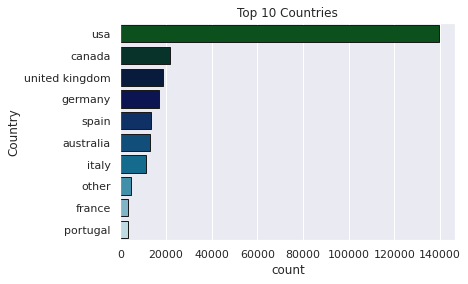

In [ ]:
# plot the top 10 countries who has maximum number of users
sns.countplot(y='Country', data=users_df, order=pd.value_counts(users_df['Country']).iloc[:10].index,
              palette='ocean', edgecolor='k')
plt.title('Top 10 Countries')
plt.show()

From the above graph, we see that the USA has highest number of users.

### **Ratings**

In [ ]:
# displaying the top 5 rows of the ratings data
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# checking datatypes
print(ratings_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None


In [ ]:
# checking for null values
print(ratings_df.isnull().sum())

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


Here, we don't have any missing values.

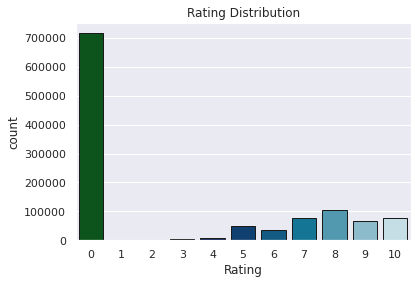

In [ ]:
# let's check the ratings distribution
sns.countplot(ratings_df['Book-Rating'], palette='ocean',
              edgecolor='k')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.show()

In [ ]:
# ratings dataset should have books only which exist in our books dataset
ratings_new = ratings_df[ratings_df.ISBN.isin(books_df.ISBN)]
print("Shape of dataset before dropping", ratings_df.shape)
print("shape of dataset after dropping", ratings_new.shape)

Shape of dataset before dropping (1149780, 3)
shape of dataset after dropping (1031136, 3)


In [ ]:
# ratings dataset should have ratings from users which exist in users dataset
ratings_new = ratings_new[ratings_new['User-ID'].isin(users_df['User-ID'])]
print("Shape of dataset before dropping",ratings_df.shape)
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1149780, 3)
shape of dataset after dropping (1031136, 3)


In [ ]:
# this is the set of books which are not having zero rating from the ratings_new dataset
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]

# this is the set of books which are having zero rating from ratings_new dataset
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [ ]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383842, 3)
ratings_implicit dataset (647294, 3)


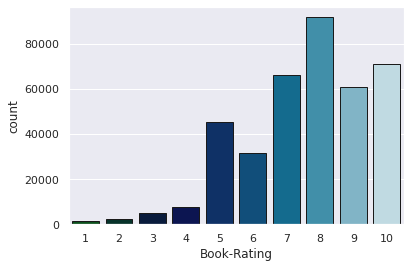

In [ ]:
sns.countplot(ratings_explicit['Book-Rating'],
              palette='ocean', edgecolor='k')
plt.show()

It can be seen that higher ratings are more common amongst users and rating 8 has been rated highest number of times.

In [ ]:
# taking each book by grouping with help of their ISBN and sum all the ratings given by different users
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['Book-Rating'].sum())

# arrange it in descending order so that those top most books can be recommended to any of the users
top10 = ratings_count.sort_values('Book-Rating', ascending=False).head(10)
print("Following Books are recommended")
top10_rated_books_summary = pd.merge(top10, books_df, on='ISBN')
top10_rated_books_summary

Following Books are recommended


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0316666343,5787,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...
1,0385504209,4108,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...
2,0312195516,3134,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...
3,059035342X,2798,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...
4,0142001740,2595,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...
5,0971880107,2551,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...
6,0060928336,2524,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...
7,0446672211,2402,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...
8,0452282152,2219,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books,http://images.amazon.com/images/P/0452282152.0...
9,0671027360,2179,Angels &amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.0...


In [ ]:
# create column average rating
ratings_explicit['Average_Rating'] = ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')

# create column sum rating
ratings_explicit['Total_Users_Rated'] = ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [ ]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Average_Rating,Total_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


In [ ]:
# merging three datasets to get the final dataset
final_df = users_df.copy()
final_df = pd.merge(final_df, ratings_explicit, on='User-ID')
final_df = pd.merge(final_df, books_df, on='ISBN')

In [ ]:
final_df.head()

,User-ID,Age,Country,ISBN,Book-Rating,Average_Rating,Total_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,8,33.0,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
1,11676,28.0,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,67544,30.0,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
3,116866,32.0,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
4,123629,33.0,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
# check the missing values
print(final_df.isnull().sum())

User-ID                0
Age                    0
Country                0
ISBN                   0
Book-Rating            0
Average_Rating         0
Total_Users_Rated      0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-L            0
dtype: int64


In [ ]:
# shape of data
print(final_df.shape)

(383842, 12)


## **Popularity based Recommendation System**

In [ ]:
C = final_df['Average_Rating'].mean()
m = final_df['Total_Users_Rated'].quantile(0.90)
top_books = final_df.loc[final_df['Total_Users_Rated'] >= m]
print('C=',C , 'm=',m)
top_books.shape

C= 7.626700569505161 m= 64.0


(38570, 12)

Here, I have used 90th percentile as cutoff. It means, for a book to feature in the charts, it must have votes more than atleast 90% of the books in the list. There are 38570 books which qualify to be in this list.

Let's calculate metric for each qualified book. To do this, we define a function weighted_rating() and create a new feature 'Score', of which we will calculate the value by applying this function to our DataFrame of qualified books.

In [ ]:
def weighted_rating(x, m=m, C=C):
  v = x['Total_Users_Rated']
  R = x['Average_Rating']
  return (v/(v+m)*R) + (m/(m+v)*C)

top_books['Score'] = top_books.apply(weighted_rating, axis=1)

# sorting books based on score calculated above
top_books = top_books.sort_values('Score', ascending=False)

In [ ]:
# keeping only one entry of each book
top_books = top_books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm = sns.light_palette('blue', as_cmap=True)
# sorting books based on score calculated above
top_books = top_books.sort_values('Score',ascending=False)

# printing top 10 books
top_books[['Book-Title', 'Book-Author','Total_Users_Rated', 'Average_Rating', 'Score']].reset_index(drop=True).head(10)

,Book-Title,Book-Author,Total_Users_Rated,Average_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,137,9.262774,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,313,8.939297,8.716469
2,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,206,9.033981,8.700403
3,To Kill a Mockingbird,Harper Lee,214,8.943925,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,133,9.082707,8.609690
5,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,77,9.402597,8.596517
6,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,141,9.035461,8.595653
7,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,119,8.983193,8.508791
8,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,189,8.783069,8.490549
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,126,8.920635,8.484783


* Harry Potter is the most popular book series. Other books like To Kill A Mockingbird and The Return of the King are among top books.
* Books by J. K. Rowling are the most rated.

## **Collaborative Filtering Recommendation System**

In [ ]:
counts1 = ratings_df['User-ID'].value_counts()  ## finding count of unique User-ID i.e, it returns the frequency of each User-ID
ratings_df = ratings_df[ratings_df['User-ID'].isin(counts1[counts1 >= 50].index)]  ## keeping users that have rated atleast 50 books
counts = ratings_df['Book-Rating'].value_counts()   ## finding count of unique User-ID
ratings_df = ratings_df[ratings_df['Book-Rating'].isin(counts[counts >= 50].index)]  ## keeping books that have atleast 50 ratings

In [ ]:
combine_book_rating = pd.merge(ratings_df, books_df, on='ISBN')
columns = ['Year-Of-Publication', 'Publisher', 'Book-Author',]
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head(20)

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-L
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...
5,9177,0446364193,7,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...
6,11400,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...
7,11676,0446364193,8,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...
8,14521,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...
9,15418,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...


In [ ]:
# book title having NaN values are dropped
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['Book-Title'])

# rows are grouped by each of the book title and book rating and then counted for each of the group
book_rating_count = (combine_book_rating.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'Total_Rating_Count'})   # rename Book-Rating column
     [['Book-Title', 'Total_Rating_Count']]
    )
book_rating_count.head()

,Book-Title,Total_Rating_Count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [ ]:
# merging number of rating dataframe with rating with books
rating_with_totalRatingCount = combine_book_rating.merge(book_rating_count, on='Book-Title')  
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-L,Total_Rating_Count
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...,198
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...,198
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...,198
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...,198
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...,198


In [ ]:
rating_with_totalRatingCount['Total_Rating_Count'].describe()

count    703434.000000
mean         35.008956
std          68.959965
min           1.000000
25%           2.000000
50%           8.000000
75%          34.000000
max         852.000000
Name: Total_Rating_Count, dtype: float64

In [ ]:
# Converting the values into float data type.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# It provides the descriptive statistcs of the data.
print(book_rating_count['Total_Rating_Count'].describe())

count   199187.00
mean         3.53
std         10.54
min          1.00
25%          1.00
50%          1.00
75%          3.00
max        852.00
Name: Total_Rating_Count, dtype: float64


The median book has been rated only once.

Let's look from 90% to 99% to identify the Total_Rating_Count for each of the percentile.

In [ ]:
print(book_rating_count['Total_Rating_Count'].quantile(np.arange(.9, 1, .01)))

0.90    6.00
0.91    7.00
0.92    7.00
0.93    8.00
0.94    9.00
0.95   11.00
0.96   13.00
0.97   17.00
0.98   23.00
0.99   39.00
Name: Total_Rating_Count, dtype: float64


* We see about 99% of books received below 39 ratings.
* Only about 1% of the books received 39 or more ratings.

As we have so many books in our dataset, we will limit to above 30 ratings only.

In [ ]:
# limiting total Total_Rating_Count
popularity_threshold = 30
rating_popular_book = rating_with_totalRatingCount.query('Total_Rating_Count >= @popularity_threshold')
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-L,Total_Rating_Count
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...,198
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...,198
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...,198
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...,198
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...,198


In [ ]:
# Checking the total size of rating_popular_book.
print(rating_popular_book.shape)

(192670, 6)


In [ ]:
# Checking the total size of rating_popular_book.
print(rating_popular_book.shape)

(192670, 6)


In [ ]:
# check the number of unique books with respect to ISBN
print(rating_popular_book['ISBN'].nunique())

7653


In [ ]:
if not rating_popular_book[rating_popular_book.duplicated(['User-ID', 'Book-Title'])].empty:

    # Identifying number of rows corresponding to the US.
    print('Actual rating_popular_book shape {0}'.format(rating_popular_book.shape))

    rating_popular_book = rating_popular_book.drop_duplicates(['User-ID', 'Book-Title'])

    # Identifying number of rows corresponding to the US duplicates.
    print('Rating_popular_book shape after removing the duplicates  {0}'.format(rating_popular_book.shape))

Actual rating_popular_book shape (192670, 6)
Rating_popular_book shape after removing the duplicates  (189333, 6)


### **Filter to the users in US**
In order to improve computing speed and not run into the 'MemoryError' issue we will limit our users data to those in the US. Then combine the user data with rating data and total rating count data.

In [ ]:
combined = rating_popular_book.merge(users_df, left_on='User-ID', right_on='User-ID', how='left')

us_user_rating = combined[combined['Country']=="usa"]
us_user_rating=us_user_rating.drop(['Age'], axis=1)
us_user_rating

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-L,Total_Rating_Count,Country
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...,198,usa
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...,198,usa
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...,198,usa
8,14521,0446364193,0,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...,198,usa
10,16795,0446364193,8,Along Came a Spider (Alex Cross Novels),http://images.amazon.com/images/P/0446364193.0...,198,usa
...,...,...,...,...,...,...,...
189316,164728,0140430105,9,Emma (Penguin Classics),http://images.amazon.com/images/P/0140430105.0...,32,usa
189319,247429,0140430105,10,Emma (Penguin Classics),http://images.amazon.com/images/P/0140430105.0...,32,usa
189320,247447,0140430105,0,Emma (Penguin Classics),http://images.amazon.com/images/P/0140430105.0...,32,usa
189327,124363,0140434151,0,Emma (Penguin Classics),http://images.amazon.com/images/P/0140434151.0...,32,usa


In [ ]:
#create pivot table where User-ID becomes our column and Book-Title become our index
from scipy.sparse import csr_matrix
us_user_rating_pivot = rating_popular_book.pivot_table(index = 'Book-Title',columns = 'User-ID', values = 'Book-Rating').fillna(0)
us_user_rating_matrix = csr_matrix(us_user_rating_pivot.values)

In [ ]:
print(us_user_rating_pivot.shape)

(2891, 3315)


In [ ]:
us_user_rating_pivot.head()

User-ID,183,243,254,507,626,638,643,741,882,929,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10 Lb. Penalty,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
101 Dalmatians,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
16 Lighthouse Road,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
import scipy
import requests
from PIL import Image
from io import BytesIO

In [ ]:
# constructing the KNN model
knn_model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn_model.fit(us_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# create a function for suggest books by book names
def recommend_books(book_name):
  distances, suggestions = knn_model.kneighbors(us_user_rating_pivot.loc[book_name,:].values.reshape(1,-1), n_neighbors = 6)
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Your Choice {0}:\n'.format(us_user_rating_pivot.index[suggestions[0][0]]))
        book_index_list=books_df.index[books_df['Book-Title'] == book_name].tolist()
        book_index = book_index_list[0]
        url = books_df['Image-URL-L'][book_index]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()
        print('\n','*'*20, "Recommendation for ", book_name , '*'*20,'\n')

    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_user_rating_pivot.index[suggestions.flatten()[i]], distances.flatten()[i]))
        book = us_user_rating_pivot.index[suggestions.flatten()[i]]
        book_ratings= us_user_rating_pivot.loc[book,:].values.reshape(1,-1).tolist()[0]
        z = []
        for i in book_ratings:
          if i !=0:
            z.append(i)
        
        print('\n Average Rating of Book is ',round(np.mean(z),1))
        book_index_list=books_df.index[books_df['Book-Title'] == book].tolist()
        book_index = book_index_list[0]
        url = books_df['Image-URL-L'][book_index]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()

Enter the Book Name: Harry Potter and the Goblet of Fire (Book 4)
Your Choice Harry Potter and the Goblet of Fire (Book 4):



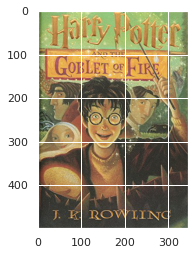


 ******************** Recommendation for  Harry Potter and the Goblet of Fire (Book 4) ******************** 

1: Harry Potter and the Prisoner of Azkaban (Book 3), with distance of 0.3241506654706975:

 Average Rating of Book is  9.1


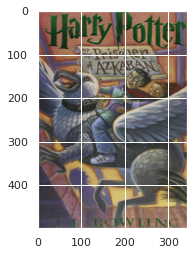

2: Harry Potter and the Chamber of Secrets (Book 2), with distance of 0.39313654741086235:

 Average Rating of Book is  8.9


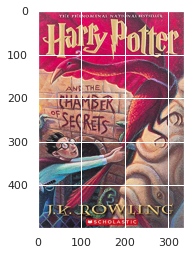

3: Harry Potter and the Order of the Phoenix (Book 5), with distance of 0.4881673128501215:

 Average Rating of Book is  9.0


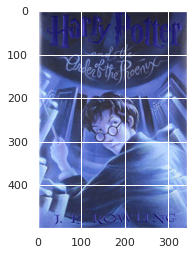

4: Harry Potter and the Sorcerer's Stone (Book 1), with distance of 0.552236898722894:

 Average Rating of Book is  9.1


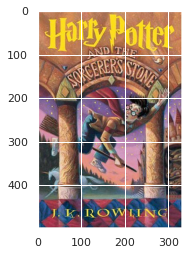

5: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)), with distance of 0.6978875114833414:

 Average Rating of Book is  9.0


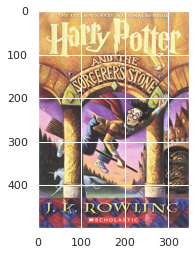

In [ ]:
name = input('Enter the Book Name: ')
recommend_books(name)

In [ ]:
# drop unwanted columns
us_user_rating.drop(['Image-URL-L'], axis=1, inplace=True)

**We are considering only those ratings that are not equal to zero.**

In [ ]:
print(us_user_rating.shape)

(149402, 6)


In [ ]:
# ratings that are not 0
us_user_rating = us_user_rating[us_user_rating['Book-Rating'] != 0]

In [ ]:
# shape
print(us_user_rating.shape)

(41419, 6)


In [ ]:
# display first 5 rows
us_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Total_Rating_Count,Country
10,16795,0446364193,8,Along Came a Spider (Alex Cross Novels),198,usa
12,18082,0446364193,7,Along Came a Spider (Alex Cross Novels),198,usa
13,19085,0446364193,8,Along Came a Spider (Alex Cross Novels),198,usa
14,21031,0446364193,10,Along Came a Spider (Alex Cross Novels),198,usa
18,28177,0446364193,7,Along Came a Spider (Alex Cross Novels),198,usa


**Filtering users with atleast 10 interaction**

In [ ]:
users_interactions_count_df = us_user_rating.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('Number of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 10].reset_index()[['User-ID']]
print('Number of users with at least 10 interactions: %d' % len(users_with_enough_interactions_df))

Number of users: 2024
Number of users with at least 10 interactions: 1307


In [ ]:
print('Number of interactions: %d' % len(us_user_rating))
interactions_from_selected_users_df = us_user_rating.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('Number of interactions from users with at least 10 interactions: %d' % len(interactions_from_selected_users_df))

Number of interactions: 41419
Number of interactions from users with at least 10 interactions: 37846


In [ ]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Book-Title,Total_Rating_Count,Country
0,243,0446606383,6,The Midnight Club,73,usa
1,243,0316776963,9,Me Talk Pretty One Day,257,usa
2,243,0140272100,6,Vanished,97,usa
3,243,0060977493,7,The God of Small Things,153,usa
4,243,0375400117,10,Memoirs of a Geisha,47,usa
5,243,0449006522,6,Manhattan Hunt Club,58,usa
6,243,0316601950,9,The Pilot's Wife : A Novel,290,usa
7,243,044023722X,7,A Painted House,390,usa
8,243,0446364800,9,The General's Daughter,104,usa
9,243,0316899984,7,"River, Cross My Heart",125,usa


**log transformation to smooth the distribution**

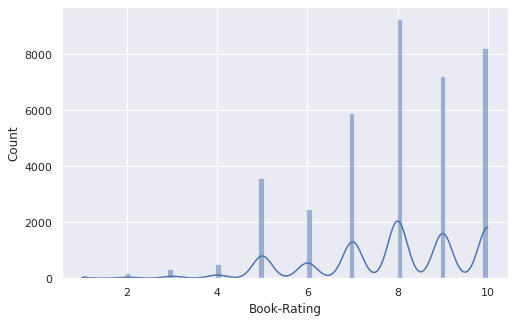

In [ ]:
# before log transformation 
plt.figure(figsize=(8,5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

In [ ]:
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.sample(5)

Number of unique user/item interactions: 37846


,ISBN,User-ID,Book-Rating
11116,0380814021,3363,3.46
32865,0684801523,211426,3.46
36847,1551664879,24933,3.46
10696,038073267X,207499,2.81
16781,0440201926,45418,2.81


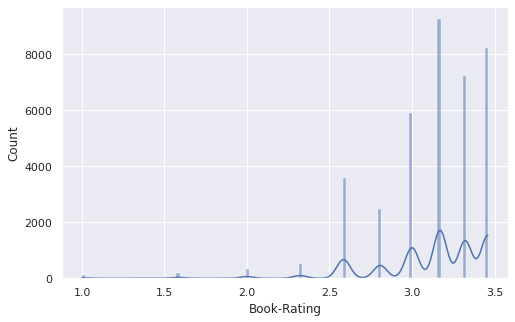

In [ ]:
# After log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_full_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

**Splitting data into Train and Test Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('Number of interactions on Train set: %d' % len(interactions_train_df))
print('Number of interactions on Test set: %d' % len(interactions_test_df))

Number of interactions on Train set: 30276
Number of interactions on Test set: 7570


In [ ]:
interactions_train_df.head()

,ISBN,User-ID,Book-Rating
32483,0679735771,242083,3.17
23058,0451184726,95932,3.46
33598,0743206045,66680,2.81
20531,0446607193,111190,2.58
13455,0399135782,46398,3.32


In [ ]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
595,0060540753,16795,3.17
26927,0553279912,258534,3.32
29868,0671004530,43806,3.46
12157,0385474016,203900,3.46
8057,0345423402,196502,3.17


In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0020198906,002026478X,0020412401,0020442203,0020442408,0020442505,0020442602,002542730X,0027701301,0028604199,...,1885171080,1895565669,1896095011,1896860982,1898901147,1931056323,193156146X,1931561648,5557121005,9501513092
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
254,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
507,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
638,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
882,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# check the list of user id of the users
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[243, 254, 507, 638, 882, 1435, 1733, 1848, 2033, 2110]

### **SVD - Model Based Colaborative filtering**
The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. It provides another way to factorize a matrix, into singular vectors and singular values.

**A=U.Sigma.VT**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity 
from scipy.sparse.linalg import svds

In [ ]:
# The number of factors to factor the user-item matrix
NUMBER_OF_FACTORS_MF = 15

# Performs matrix factorization of the original user-item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k=NUMBER_OF_FACTORS_MF)

In [ ]:
print(users_items_pivot_matrix.shape)

(1307, 4949)


In [ ]:
print(U.shape)

(1307, 15)


In [ ]:
sigma = np.diag(sigma)
print(sigma.shape)

(15, 15)


In [ ]:
print(Vt.shape)

(15, 4949)


In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 0.00615014,  0.01434084,  0.00050067, ...,  0.00722985,
         0.00318982,  0.01808888],
       [ 0.0082173 ,  0.01212672,  0.00614415, ..., -0.00015376,
         0.00994811, -0.0226457 ],
       [ 0.00161098,  0.00217957,  0.00088614, ...,  0.00677796,
         0.00159144, -0.01666302],
       ...,
       [ 0.02581979,  0.00340716,  0.00035243, ...,  0.00845787,
         0.00037069, -0.0062752 ],
       [-0.0384043 ,  0.016257  ,  0.00107074, ...,  0.01613524,
         0.00401623,  0.05854124],
       [ 0.00177651,  0.00359495,  0.00212456, ..., -0.00321167,
         0.00184063, -0.00368694]])

In [ ]:
print(all_user_predicted_ratings.shape)

(1307, 4949)


In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,243,254,507,638,882,1435,1733,1848,2033,2110,...,276680,277427,277639,278026,278137,278188,278418,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
0020198906,0.01,0.01,0.00,-0.02,-0.00,-0.00,-0.00,0.00,0.01,0.01,...,0.02,0.07,0.01,0.02,0.00,0.00,0.00,0.03,-0.04,0.00
002026478X,0.01,0.01,0.00,0.02,0.00,0.01,0.00,0.00,0.02,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00
0020412401,0.00,0.01,0.00,0.01,0.00,-0.00,0.00,-0.00,0.01,0.00,...,0.00,0.01,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
0020442203,-0.01,0.05,0.00,0.01,0.01,0.00,0.01,0.01,0.04,0.02,...,0.02,0.02,-0.00,-0.01,0.00,-0.00,0.00,-0.00,-0.00,0.02
0020442408,-0.01,0.01,0.00,0.01,0.01,-0.00,0.01,0.01,-0.00,0.01,...,0.02,0.02,0.01,-0.01,0.00,-0.00,0.00,-0.01,-0.01,0.01


In [ ]:
print(cf_preds_df.shape[1])

1307


### **Colaborative Filtering Recommender Class**

In [ ]:
import random

In [ ]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME

        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books_df, on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

# **Evaluation**

In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with **Top-N accuracy metrics**, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

### This evaluation method works as follows:

* For each user
    * For each item the user has interacted in test set
        * Sample 100 other items the user has never interacted.   
        * Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        * Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* Aggregate the global Top-N accuracy metrics

In [ ]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

The Top-N accuracy metric choosen was **Recall@N** which evaluates whether the interacted item is among the top N items (hit) in the ranked list of 101 recommendations for a user.

In [ ]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(us_user_rating['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))
      # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()

In [ ]:
print(list(interactions_full_indexed_df.index.values))

[7346, 14422, 108352, 140036, 157273, 68943, 95359, 104113, 248718, 264947, 271448, 190708, 16634, 55492, 96448, 114414, 122429, 173291, 197687, 203240, 228998, 16634, 38023, 66878, 126736, 38023, 93363, 228021, 16634, 88733, 228021, 243294, 257028, 10030, 12538, 16996, 41084, 52584, 71712, 110934, 113270, 128835, 150979, 171602, 173291, 174216, 175117, 179734, 183995, 208671, 225763, 229741, 269566, 277427, 12538, 123257, 130554, 7346, 52584, 150979, 155147, 249894, 23571, 52584, 113904, 125519, 128835, 196160, 249894, 251843, 172742, 37208, 98391, 107784, 176214, 261998, 269321, 193676, 4017, 6575, 8454, 10560, 17003, 89602, 104113, 115435, 201042, 224349, 259626, 29526, 44845, 93426, 135149, 142715, 165308, 205980, 227836, 265115, 271705, 98391, 27472, 261829, 98391, 174216, 229011, 254377, 258185, 265115, 203799, 16795, 31315, 61854, 131046, 235282, 242106, 93047, 94951, 98391, 114988, 271558, 254899, 123790, 169233, 202277, 216466, 249894, 40415, 69378, 124487, 187574, 214786, 242

In [ ]:
user=int(input("Enter User ID from above list for book recommendation:  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation:  104113
Recommendation for User-ID =  104113
         ISBN                                         Book-Title  recStrength
0  0060928336    Divine Secrets of the Ya-Ya Sisterhood: A Novel         0.43
1  0446310786                              To Kill a Mockingbird         0.32
2  0452282152                          Girl with a Pearl Earring         0.30
3  0375727345                              House of Sand and Fog         0.29
4  0312195516                The Red Tent (Bestselling Backlist)         0.27
5  0060392452  Stupid White Men ...and Other Sorry Excuses fo...         0.26
6  0385504209                                  The Da Vinci Code         0.25
7  0142001740                            The Secret Life of Bees         0.24
8  0140293248            The Girls' Guide to Hunting and Fishing         0.24
9  0312278586                         The Nanny Diaries: A Novel         0.24


In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(us_user_rating['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        hits_at_15_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10
            hit_at_15, index_at_15 = self._verify_hit_top_n(item_id, valid_recs, 15)
            hits_at_15_count += hit_at_15

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        recall_at_15 = hits_at_15_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'hits@15_count':hits_at_15_count,
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10,
                          'recall@15': recall_at_15}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_15 = detailed_results_df['hits@15_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10,
                          'recall@15': global_recall_at_15}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
1306 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.31175693527080584, 'recall@10': 0.4355350066050198, 'recall@15': 0.51889035667107}


,hits@5_count,hits@10_count,hits@15_count,interacted_count,recall@5,recall@10,recall@15,User-ID
0,17,24,26,59,0.29,0.41,0.44,16795
16,13,19,26,58,0.22,0.33,0.45,98391
47,19,23,26,54,0.35,0.43,0.48,153662
7,30,36,43,52,0.58,0.69,0.83,114368
128,23,28,32,51,0.45,0.55,0.63,104636
159,6,7,12,47,0.13,0.15,0.26,95359
336,9,14,17,41,0.22,0.34,0.41,158295
59,21,29,29,34,0.62,0.85,0.85,123883
347,8,10,15,32,0.25,0.31,0.47,60244
109,5,7,9,30,0.17,0.23,0.30,35859


### **Conclusion**

Throughout the study, we performed various steps to build a book recommender system. We started with data wrangling in which we tried to handle null values and performed feature modifications. Next, we did some exploratory data analysis and tried to draw observations out of it.
Finally, A book recommendation system was designed using different filtering techniques. After implementing Collaborative Filtering model (SVD matrix factorization), we are satisfied with the results. We observe that we got Recall@10 (43%) and Recall@15 (52%), which is fair such a large dataset.

Conclusion from analysis includes:
* "Selected Poems" were read more by the users.
* Majority of the users are from USA.
* "Harlequin" has published the most number of books.
* Among Authors, "Agatha Christie" has written the most number of books followed by "William Shakespeare" and "Stephen King".

In this study, we limit ourselves to collaborative filtering methods. However the information about the books can be easily obtained using the ISBN number of the book, to overcome the cold start problem when the new user becomes a member or when a new book is released. A hybrid of content based and collaborative filtering methods can be used to generate more relevant recommendations.